Gonna pratice making mark's code using XRBCATs

Select source_id, ra, ra_error, dec, dec_error, pmra, pmra_error, pmdec, pmdec_error, parallax, parallax_error,
radial_velocity, radial_velocity_error, phot_g_mean_mag FROM gaiadr3.gaia_source
JOIN gaiadr3_source USING (source_id) WHERE source_id = user_kkumar16.hxb_catalogue.GaiaDR3

In [1]:
import numpy as np
import pandas as pd
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
from astropy.table import Column
from astropy.io import ascii

import astropy.coordinates as coords
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import astropy_mpl_style
path = '/home/karan/Documents/UvA/Thesis/DATA QUERY/'
file = path + 'HMXB_cat.csv'
data = pd.read_csv(file,dtype={'GaiaDR3':str})

In [2]:
#constantsradians
RUWE= 1.4 #Mitch
R0 = 8.5 # kpc distance to the sun from galactic center
sun_curve = 220 #km/s fich 1988, brand 1993
### find these values
#Johnson 1986
ra_np = np.radians(192.25) # deg to radians right acsension of north pole
dec_np = np.radians(27.4) # deg to radians decliatoin of north pole
theta_o = np.radians(123) # deg to radiansradians
k  = 4.74 #km/s per mas/yr 

#solar values
# solar motion km/s 
# M. Carretero-Castrillo 2023 and Ried 2019
U_sun = 10.8
V_sun = 13.6
W_sun = 7.6

In [3]:
data.columns

Index(['Name', 'RA_ICRS', 'DE_ICRS', 'IDFlag', 'XrayType', 'Porb', 'Ppulse',
       'CRSF', 'SpType', 'GaiaDR3', 'FXMMmin', 'FXMMmax', 'FChandmin',
       'FChandmax', 'ChandInst', 'FXRTmin', 'FXRTmax', 'FBATmin', 'FBATmax',
       'FINTmin', 'FINTmax', 'Mass', 'Dist', 'Teff', 'Lopt', 'Img'],
      dtype='object')

In [4]:
identifers = data['GaiaDR3']

In [5]:
identifers = identifers.dropna()

In [6]:
list_identifers = identifers.tolist() # convert to list

str_identifers = ','.join(map(str,list_identifers))

query = f"""
    Select 
	source_id, ra, ra_error, dec, dec_error, pmra, pmra_error, pmdec, pmdec_error, parallax, parallax_error,
	radial_velocity, radial_velocity_error, phot_g_mean_mag, l,b,phot_bp_mean_mag,phot_rp_mean_mag, bp_rp
FROM gaiadr3.gaia_source
WHERE source_id IN ({str_identifers})"""



# Fun Stars

source_id 2021785421455305344 (600 kpc)

In [7]:
job = Gaia.launch_job(query)
results = job.get_results()
type(results)

astropy.table.table.Table

# Lets make a function
## Query Gaia DR3 for different given query 

In [8]:
def make_query(list_ID, query):
    '''Make a query for gaia DR3 using a list of GAIA identifers
    input:
    list_ID  - list: gaia source IDs, make sure IDs are clean
    query - str: SQL query to use in GAIA
    return;
    Results- Astropy Table- query results from GAIA 
    
    '''
    #convert list to string map
    str_map = ','.join(map(str,list_ID))
    job = Gaia.launch_job(query)
    results =job.get_results()
    return results

In [9]:
print(query)


    Select 
	source_id, ra, ra_error, dec, dec_error, pmra, pmra_error, pmdec, pmdec_error, parallax, parallax_error,
	radial_velocity, radial_velocity_error, phot_g_mean_mag, l,b,b,phot_bp_mean_mag,phot_rp_mean_mag, bp_rp
FROM gaiadr3.gaia_source
WHERE source_id IN (427234969757165952,426558460884582016,414196617287885312,524924310153249920,524677469790488960,519352324516039680,511220031584305536,518990967445248256,465645515129855872,465628193526364416,444752973131169664,168450545792009600,276644757710014976,252878401557369088,184497471323752064,3441207615229815040,3431561565357225088,3423526544838563328,3131822364779745536,3131755947406031104,3052677318793446016,2935943990338336000,5613494119551805184,5489434710755238400,5597252305589385984,5548261400354128768,5541793213959987968,5523448274762133632,5522306019626566528,5620657678322625920,5311384333263075840,5258414192353423360,5259009543533179648,5255509901121774976,5352018121173519488,5337747731560719616,5336957010898124160,533749

In [10]:
HMXB_query = make_query(list_identifers,query)

In [11]:
#for exporting
HMXB_query.write("HMXB_with XRBCATS.csv",format='csv',overwrite=True)

In [12]:
HMXB_table = ascii.read('HMXB_with XRBCATS.csv',format='csv')

In [13]:
HMXB_table

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,b2,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
168450545792009600,58.84615062234396,0.02955361269414425,31.045836091857545,0.02079164795577526,-1.282117252826291,0.05307381600141525,-1.8690907560201113,0.030308086425065994,1.627402622661778,0.03745640814304352,--,--,6.261696815490723,163.0813533466715,-17.136203125538678,-17.136203125538678,6.439853668212891,5.930059909820557,0.509793758392334
184497471323752064,80.64680481184236,0.025397874414920807,37.6759929364201,0.01957647316157818,1.3049449567151956,0.04082612693309784,-3.9994793622028038,0.02804887294769287,0.7213697567669315,0.030094077810645103,--,--,7.2317328453063965,170.05338802722687,0.7103172589013076,0.7103172589013076,7.376429080963135,6.921237945556641,0.45519113540649414
252878401557369088,70.24720739300419,0.011905986815690994,44.53034418647852,0.008385959081351757,0.10064623612212906,0.016362275928258896,-1.186127754569379,0.013658520765602589,0.378823380551682,0.015042701736092567,--,--,10.40385627746582,159.8470955000755,-1.2700235829277626,-1.2700235829277626,10.832097053527832,9.79090690612793,1.0411901473999023
276644757710014976,64.92556123476727,0.012604312971234322,55.999360679043434,0.008108320645987988,-0.4735607216045463,0.01827656850218773,-0.5096656032780096,0.013492867350578308,0.2100882458297216,0.014864281751215458,--,--,10.766115188598633,149.17651611413766,4.133059262254314,4.133059262254314,11.439369201660156,9.855047225952148,1.5843219757080078
414196617287885312,18.996040698840275,0.010982572101056576,59.15394486765568,0.012779636308550835,-2.4625832668630094,0.014893881045281887,-0.546486466252775,0.01677328534424305,0.3391933399322079,0.018039019778370857,--,--,11.412055969238281,126.08000772759438,-3.5676859152271287,-3.5676859152271287,11.667165756225586,10.951165199279785,0.7160005569458008
426558460884582016,14.177450998208093,1.8335996866226196,60.71672280471204,2.3911945819854736,--,--,--,--,--,--,--,--,2.0645833015441895,123.57698659515256,-2.1484240190698634,-2.1484240190698634,2.7258431911468506,2.31510853767395,0.4107346534729004
427234969757165952,9.290132580203235,0.008413794450461864,61.36013319063004,0.009818237274885178,-1.7956235405295953,0.010947090573608875,-0.5251300483100196,0.013608978129923344,0.27189066538368456,0.012059882283210754,--,--,9.454655647277832,121.22141620023214,-1.4641898756122689,-1.4641898756122689,9.76897144317627,8.949126243591309,0.8198451995849609
444752973131169664,53.749629724978455,0.013929484412074089,53.17313997828423,0.012730369344353676,-0.26805266659388,0.019742585718631744,0.4401283844933388,0.01982794515788555,0.13434727271763658,0.020151322707533836,--,--,14.200214385986328,146.05208942276994,-2.1940257086354467,-2.1940257086354467,15.475269317626953,13.086570739746094,2.3886985778808594
465628193526364416,40.91843191991435,0.006756731308996677,61.434377668355616,0.008564884774386883,-0.7289798897496916,0.010312550701200962,0.13432816094165279,0.011728739365935326,0.18150880543038156,0.011328215710818768,--,--,12.386541366577148,135.93415668064728,1.4287879422071408,1.4287879422071408,13.053085327148438,11.57657527923584,1.4765100479125977


# Data Modification

In [14]:
#offset Parallax
HMXB_table['parallax'] = HMXB_table['parallax'] - 0.021 # from GAIA EDR3
#add parallax units
HMXB_table['parallax'].unit= u.mas

In [15]:
HMXB_table.columns

<TableColumns names=('source_id','ra','ra_error','dec','dec_error','pmra','pmra_error','pmdec','pmdec_error','parallax','parallax_error','radial_velocity','radial_velocity_error','phot_g_mean_mag','l','b','b2','phot_bp_mean_mag','phot_rp_mean_mag','bp_rp')>

# adding data to table first is Distance to Galactic center

In [16]:
# def find_radial_source(table):
#     '''Fix this'''
#     non_zero_rad = data[~np.isnan(table['radial_velocity'])]
#     rv_sources  = Table(non_zero_rad)
#     return rv_sources
# rv_table = find_radial_source(HMXB_table)

In [17]:
def Galaxy_dist(table):
    '''find the distance an object is to the center of the galaxy based on law of cosine
    input:
    long (l)- galactic longitutde in degree
    lat(b)- galactic latitute in degrees 
    object_dist (d) - distance from the sun to the object in kpc
    return 
    R - distance from the object to the galactic centre in kpc
    '''
    long = np.radians(table['l']) #convert to radians
    lat = np.radians(table['b'])
    obj_dist = table['distance'] # kpc
    R_sqrd = R0**2 + (obj_dist**2 * np.cos(lat)**2) - 2*R0*obj_dist*np.cos(long)*np.cos(lat)
    R = np.sqrt(R_sqrd)
    return R

In [18]:
distance = 1/HMXB_table['parallax'] # kpc

HMXB_table.add_column(distance, name='distance') # distance from object to sun in kpc
HMXB_table['distance'].unit= u.kpc

In [19]:
long = HMXB_table['l']
lat = HMXB_table['b']
galactic_dist = Galaxy_dist(HMXB_table)

In [20]:
HMXB_table.add_column(galactic_dist, name = 'galactic distance')
HMXB_table['galactic distance'].unit = u.kpc

In [21]:
def make_sky(table):
    '''Create a galactic coordinate table from astropy table proper motion, ra,dec and distance to object'''
    ra = table['ra'] # deg
    dec= table['dec']#deg
    pmra= table['pmra'] #mas/yr
    pmdec = table['pmdec']
    distance = table['distance'] #kpc
    sky = SkyCoord(ra = ra* u.deg, dec =dec *u.deg, pm_ra_cosdec= pmra*u.mas/u.yr, pm_dec=pmdec*u.mas/u.yr, distance=distance*u.kpc, frame='icrs')
    galactic= sky.transform_to('galactic')
    return galactic
HMXB_galactic = make_sky(HMXB_table)

In [22]:
def rotation_curve(gal_dist):
    '''From brand 1993 and fich 1988
    Calculate the circular velocity of a star based on its galactocentric distance
    return in km/s'''
    #best fit constants for rotational curve  fit
    a1 = 1.00767
    a2 = 0.0394
    a3 = 0.00712
    # fit from Brand 1988
    theta  = a1*((gal_dist/R0)**a2) + a3
    theta = sun_curve*theta #km/s
    return theta


In [23]:
#calculate Theoretical roational velocity
circular_velocity = rotation_curve(HMXB_table['galactic distance'])
HMXB_table.add_column(circular_velocity, name='circular velocity')
HMXB_table['circular velocity'].unit= u.km/u.s

In [24]:
def diff_rot_velocity(long, lat, gal_dist,theta):
    '''The velocity component due to differential Galactic rotation-Gies 1986
    NOT radial velocity
    '''
    long = np.radians(long)
    lat = np.radians(lat)
    V_GR = R0*((theta/gal_dist) -(theta_o)/R0)*np.sin(long)*np.cos(lat)
    return V_GR
V_GR = diff_rot_velocity(HMXB_table['l'],HMXB_table['b'],HMXB_table['galactic distance'],HMXB_table['circular velocity'])

In [25]:
HMXB_table.add_column(V_GR, name='GR velocity')

In [26]:
HMXB_table['GR velocity'].unit= u.km/u.s

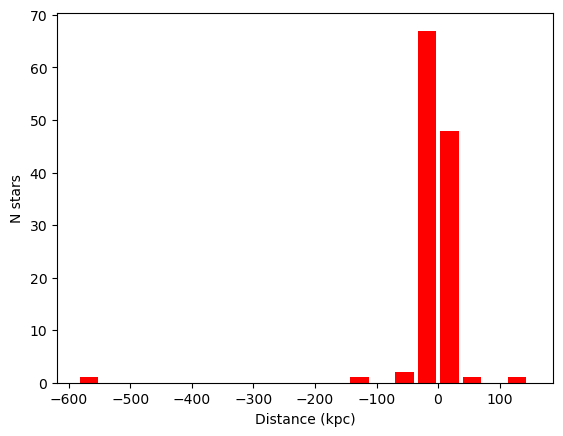

In [27]:
plt.hist(HMXB_table['distance'],bins=20,width=30,color='red')
plt.ylabel('N stars')
plt.xlabel('Distance (kpc)')
plt.show()

# Make a Sky coordinate object for my system

In [28]:
HMXB_table.columns

<TableColumns names=('source_id','ra','ra_error','dec','dec_error','pmra','pmra_error','pmdec','pmdec_error','parallax','parallax_error','radial_velocity','radial_velocity_error','phot_g_mean_mag','l','b','b2','phot_bp_mean_mag','phot_rp_mean_mag','bp_rp','distance','galactic distance','circular velocity','GR velocity')>

In [29]:
pm_l = HMXB_galactic.pm_l_cosb
pm_b = HMXB_galactic.pm_b
HMXB_table.add_column(pm_l, name='pm_l')
HMXB_table.add_column(pm_b, name='pm_b')

In [30]:
#HMXB_table['pm_1']

# Plotting


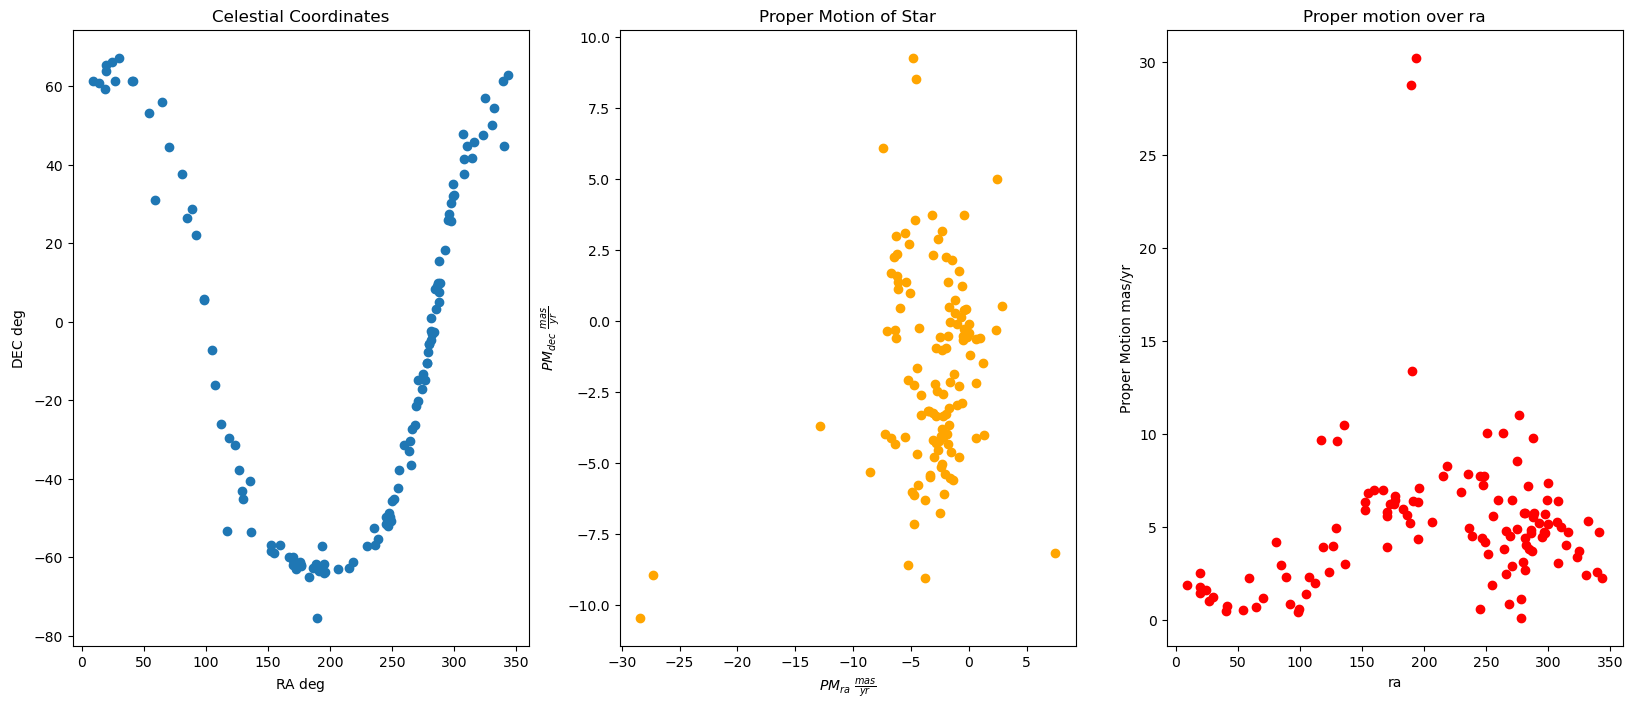

In [31]:

def plot_motion(table,plot):
    '''From a table plot PMra, PMDec, RA and De
    table- astropy table
    plot - boolean'''
    ra = table['ra']
    dec = table['dec']
    pmra = table['pmra']
    pmdec = table['pmdec']
    pm = np.sqrt(pmra**2 + pmdec**2) #proper motion magnitude
    if plot:
        fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20,8))
        ax1.scatter(ra,dec)
        ax1.set_xlabel(r"RA $\deg$")
        ax1.set_ylabel(r"DEC $\deg$")
        ax1.set_title("Celestial Coordinates")

        ax2.scatter(pmra, pmdec,color='orange')
        ax2.set_xlabel(r"$PM_{ra}$ $\frac{mas}{yr}$")
        ax2.set_ylabel(r"$PM_{dec}$ $\frac{mas}{yr}$")
        ax2.set_title("Proper Motion of Star")

        ax3.set_title('Proper motion over ra')
        ax3.set_xlabel('ra')
        ax3.set_ylabel('Proper Motion mas/yr')
        ax3.scatter(ra, pm,color='red')

        
        plt.show()

    return None
plot_motion(HMXB_table,True)

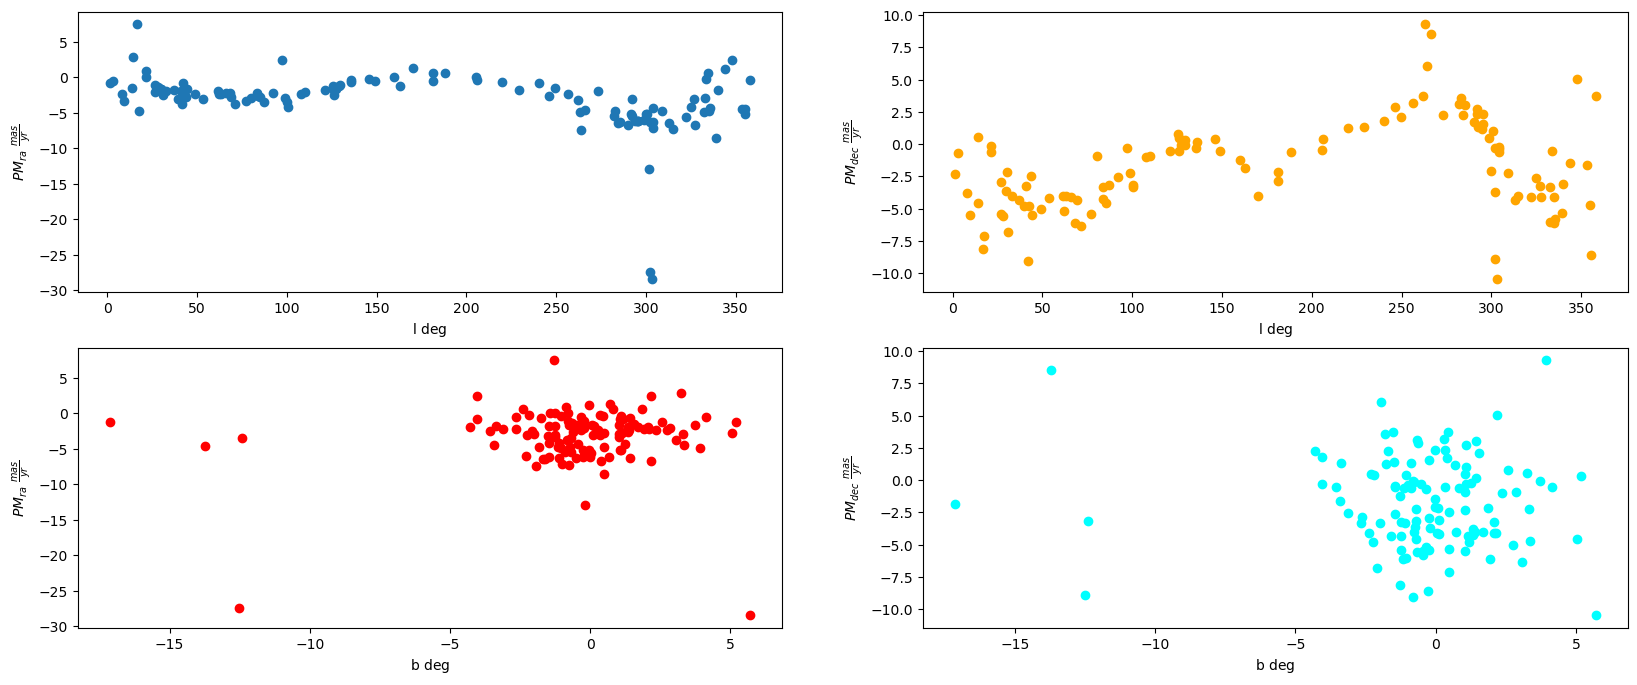

In [32]:
#proper motion vs l
def plot_proper_motion_v2(table,plot):
    '''From a table plot PMra, PMDec, RA and De
    table- astropy table
    plot - boolean'''
    l = table['l']
    b = table['b']
    pmra = table['pmra']
    pmdec = table['pmdec']
    pm = np.sqrt(pmra**2 + pmdec**2) #proper motion magnitude
    if plot:
        fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(20,8))
        ax1.scatter(l,pmra)
        ax1.set_xlabel(r"l $\deg$")
        ax1.set_ylabel(r"$PM_{ra}$ $\frac{mas}{yr}$")
        #ax1.set_title("Celestial Coordinates")

        ax2.scatter(l, pmdec,color='orange')
        ax2.set_xlabel(r"l $\deg$")
        ax2.set_ylabel(r"$PM_{dec}$ $\frac{mas}{yr}$")
        #ax2.set_title("Proper Motion of Star")

        ax3.scatter(b, pmra,color='red')
        ax3.set_xlabel(r"b $\deg$")
        ax3.set_ylabel(r"$PM_{ra}$ $\frac{mas}{yr}$")
        #ax3.set_title("Proper Motion of Star")

        ax4.scatter(b, pmdec,color='cyan')
        ax4.set_xlabel(r"b $\deg$")
        ax4.set_ylabel(r"$PM_{dec}$ $\frac{mas}{yr}$")
        #ax4.set_title("Proper Motion of Star")
        return None
plot_proper_motion_v2(HMXB_table, True)

# Plot Tangential Velocity and error

In [33]:
HMXB_table.columns

<TableColumns names=('source_id','ra','ra_error','dec','dec_error','pmra','pmra_error','pmdec','pmdec_error','parallax','parallax_error','radial_velocity','radial_velocity_error','phot_g_mean_mag','l','b','b2','phot_bp_mean_mag','phot_rp_mean_mag','bp_rp','distance','galactic distance','circular velocity','GR velocity','pm_l','pm_b')>

In [34]:
def tangential_velocity(table, plot):
    '''Constusct the Tangential velocity of a star
    Vt=  k*(proper motion) * (distance)
    This is wrong, something about working in ra and dec coordinates i think'''
    #proper motions
    pmra = table['pmra'] # mas/yr
    pmdec = table['pmdec']
    pm = np.sqrt(pmra**2 + pmdec**2)
    dist = table['distance']

    #
    long = table['l']
    #errors
    pmra_err = table['pmra_error']
    pmdec_err = table['pmdec_error']
    pm_err = (pmra*pmra_err) + (pmdec*pmdec_err)
    pm_err = pm_err/pm

    #distance errors
    dist_err = 1/table['parallax_error'] #kpc

    #calculate tangential velocity
    vt= k*pm*dist #km/s
    vt_err = np.abs(vt)*np.sqrt((dist_err/dist)**2 + (pm_err/pm)**2)

    
    #make a bunch of vt at varying distances
    dist_arry = np.array([1,2,3,4])
    pm_test = np.linspace(0,100)
    long_test = np.linspace(0,360) # deg
    #for test_dist in dist_arry:
        #vt_test =k*pm_test*test_dist
        #plt.plot(long_test,vt_test,label=f"d={test_dist}Kpc")
    # plt.errorbar(long,vt,yerr=0,label='data',linestyle='',fmt='o',color='black',alpha=0.7)
    
    # if plot:
    #     plt.legend()
    #     plt.title("Tangential Velocity")
    #     plt.xlabel('Galactic Longigtude (deg)')
    #     plt.ylabel(r'$V_t$ km/s')
    #     #plt.ylim(-200,200)
        
    #     plt.show()
    #plot the resulting figure and error bars against longitude 
    return vt, vt_err
vt, vt_err =tangential_velocity(HMXB_table,True)

In [35]:
def compare_galactic_pm(table,vt):
    '''I need to calculate the proper motion in l and b manually and compare them to the calculated values given to me by astropy.'''
    lat = np.radians(table['b'])
    long = np.radians(table['l'])
    dist = table['distance']

    #my calcultion
    # mas/yr
    mu_l = vt*np.cos(lat)/(k*dist)
    mu_b = vt*np.sin(lat)/(k*dist)

    #define units
    mu_l = mu_l *u.mas/u.yr
    mu_b = mu_b *u.mas/u.yr
    
    #skycoord value
    sky_mul = table['pm_l']
    sky_mub = table['pm_b']

    l_residual = mu_l - sky_mul
    b_residual = mu_b - sky_mub

    
    return l_residual, b_residual

In [36]:
l_residual, b_residual = compare_galactic_pm(HMXB_table, vt)
print(np.average(l_residual),np.average(b_residual))

9.510943331671307 mas / yr 0.48692133730194315 mas / yr


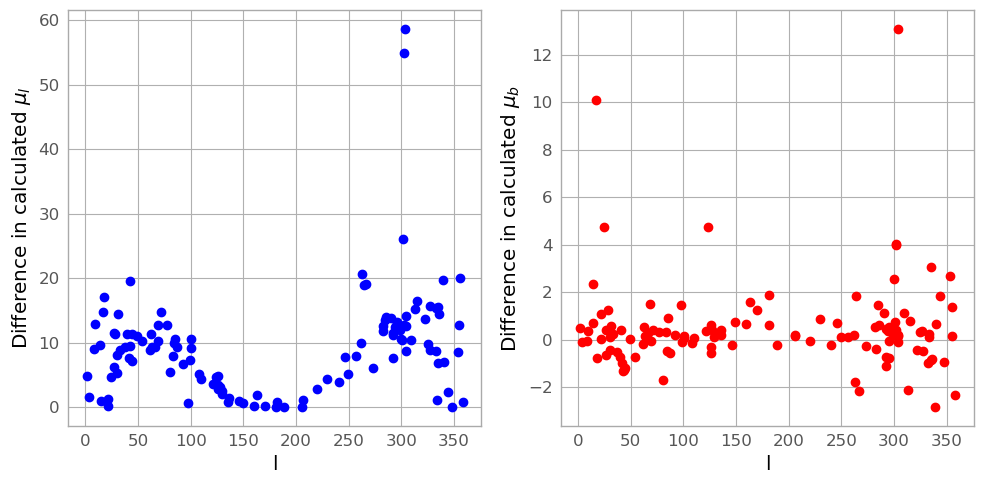

In [54]:

# Create a figure and a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# First subplot
axs[0].scatter(long, l_residual, color='b', label='Sine Wave')
axs[0].set_title('')
axs[0].set_xlabel('l')
axs[0].set_ylabel(r'Difference in calculated $\mu_l$')

axs[0].grid(True)

# Second subplot
axs[1].scatter(long, b_residual, color='r', label='Cosine Wave')
axs[1].set_title('')
axs[1].set_xlabel('l')
axs[1].set_ylabel(r'Difference in calculated $\mu_b$')

axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Notes for Above

here im comparing my calculated proper motions to what astropy provides at a star's given distance. I notice the difference in $\mu_b$is much smaller compared to differences $\mu_l$ And the difference in $\mu_l$ is larger a the edges of longitude

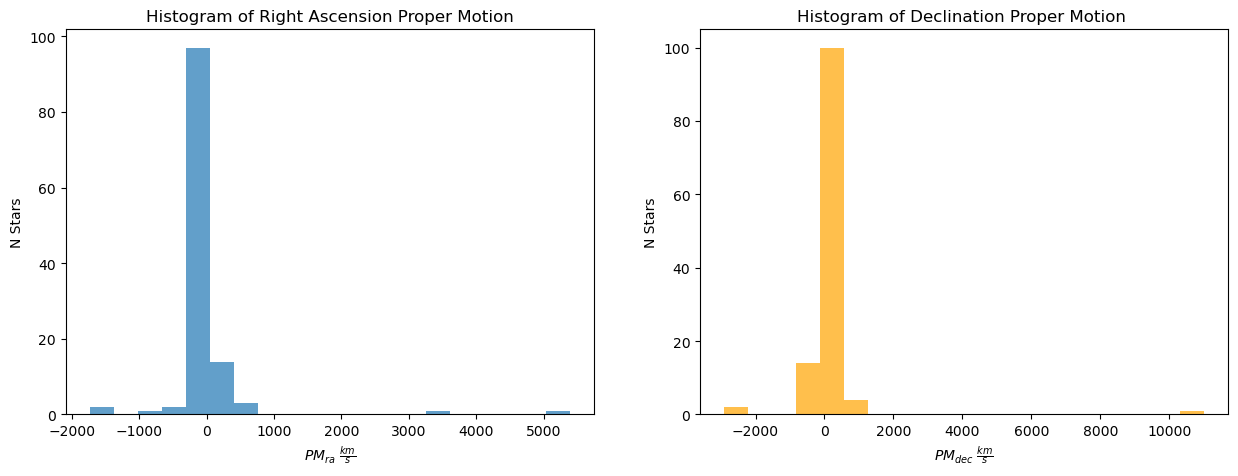

In [38]:
#pmra and pmdec in km/s histogram
#moffat 1998
V_pmra = k*HMXB_table['pmra']/HMXB_table['parallax']
V_pmdec = k*HMXB_table['pmdec']/HMXB_table['parallax']


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
ax1.hist(V_pmra, bins=20,alpha=0.7)
ax1.set_xlabel(r"$PM_{ra}$ $\frac{km}{s}$")
ax1.set_ylabel('N Stars')
ax1.set_title("Histogram of Right Ascension Proper Motion")

ax2.hist(V_pmdec, bins=20,alpha=0.7,color='orange')
ax2.set_xlabel(r"$PM_{dec}$ $\frac{km}{s}$")
ax2.set_ylabel('N Stars')
ax2.set_title("Histogram of Declination Proper Motion ")

plt.show()


# Plot a Celestial Map of the Runaways

/home/karan/miniforge3/envs/GAIA_Query/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3785: RuntimeWarning: invalid value encountered in divide
  return sin(y)/y


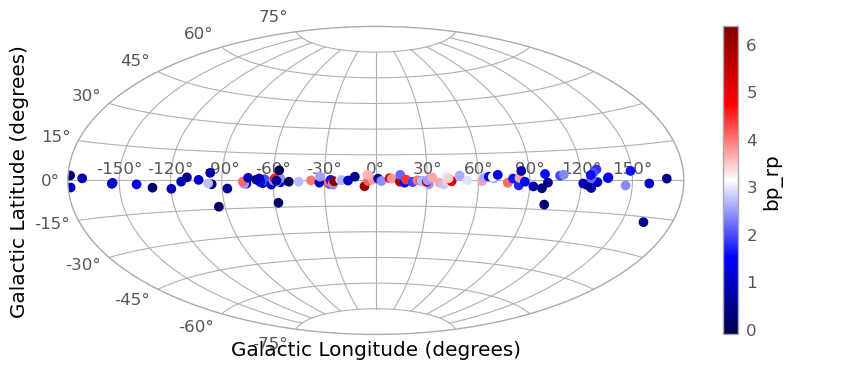

In [39]:
import astropy.coordinates as coords
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
ra = HMXB_table['ra']
dec = HMXB_table['dec']
bp_rp = HMXB_table['bp_rp']
gmap = SkyCoord(ra= ra *u.deg, dec=dec *u.deg)
#convert to galactic coords
gmap = gmap.transform_to('galactic')

gal_l , gal_b= gmap.l,gmap.b

fig, ax  = plt.subplots(1,figsize=(10,4))

plt.axis('off')
fig.add_subplot(111, projection = 'aitoff')
plt.subplot(projection="aitoff")
gal_map = plt.scatter(gal_l.wrap_at(180*u.deg).radian, gal_b.radian,c=bp_rp,cmap='seismic')
fig.colorbar(gal_map,label='bp_rp')
# Set labels for axes
plt.xlabel('Galactic Longitude (degrees)')
plt.ylabel('Galactic Latitude (degrees)')
ax.grid(True)
plt.show()

# Galactocentric Distance

In [40]:
def transform_space_velocity(ra, dec):
    '''Johnson 1986 calculate space velocities
    Use a transformation Matrix to convert ra and dec corrdinates into space velocity components
                                                UVW

    Notes:
    Transform is correct for Johnson 1986 constants
    input:
    ra- right ascension of star in radians
    dec - declinatoin of star in radians

    Transform - see johnson 1986
    A- coordinate matrix
    Return the dot product of Transform and A

    
    '''
    
    T1= np.array([[np.cos(theta_o), np.sin(theta_o), 0.0],
                        [np.sin(theta_o), -np.cos(theta_o), 0.0],
                        [0.0,0.0,1.0]])
    T2 =  np.array([[-np.sin(dec_np), 0.0, np.cos(dec_np)],
                        [0.0,-1.0,0.0],
                        [np.cos(dec_np), 0.0, np.sin(dec_np)]])
    T3 = np.array([[np.cos(ra_np), np.sin(ra_np), 0.0],
                        [np.sin(ra_np), -np.cos(ra_np), 0.0],
                        [0.0,0.0,1.0]])
    # @ is a matrix operator
    #this is correct with Johnson 1986 values 
    Transform = T1 @ T2 @ T3 # transformation matrix
    A = np.array([[np.dot(np.cos(ra),np.cos(dec)), -np.sin(ra), np.dot(np.cos(ra),np.sin(dec))],
                 [np.dot(np.sin(ra), np.cos(dec)), np.cos(ra), -np.dot(np.sin(ra), np.sin(dec))],
                 [np.sin(dec), 0.0, np.cos(dec)]])
    #each star will have a unique matrix
    B = Transform @ A
    return B
x = transform_space_velocity(20,20)
x

array([[-0.77775116, -0.29499892,  0.50513425],
       [ 0.59403983, -0.63361263,  0.86277111],
       [ 0.20547461,  0.71519974,  0.02157328]])

In [41]:
def calculate_space_velocity(astro_table):
    '''Caulate the space velocity of a star WRT the local standard of rest, subtracting solar motion'''

    UVW = []
    for row in astro_table:
        ra = np.radians(row['ra'])
        dec = np.radians(row['dec'])
        
        pmra = row['pmra'] * 1e-3  # mas/yr to as/yr
        pmdec = row['pmdec'] * 1e-3
        
        prlx = row['parallax'] * 1e-3  # mas to as
        radial = row['radial_velocity']  # km/s
        B= transform_space_velocity(ra, dec) # calculate the transform tensor
    
        comp_array = np.array([radial, k*pmra/prlx, k*pmdec/prlx])
        UVW_val = np.dot(B,comp_array)
        #subtract solar motions
        UVW_val[0] = UVW_val[0] - U_sun
        UVW_val[1] = UVW_val[1] - V_sun
        UVW_val[2] = UVW_val[2] - W_sun
        UVW.append(UVW_val)
    return np.array(UVW)
    
test = calculate_space_velocity(HMXB_table)

/tmp/ipykernel_542035/2095896106.py:16: UserWarning: Warning: converting a masked element to nan.
  comp_array = np.array([radial, k*pmra/prlx, k*pmdec/prlx])


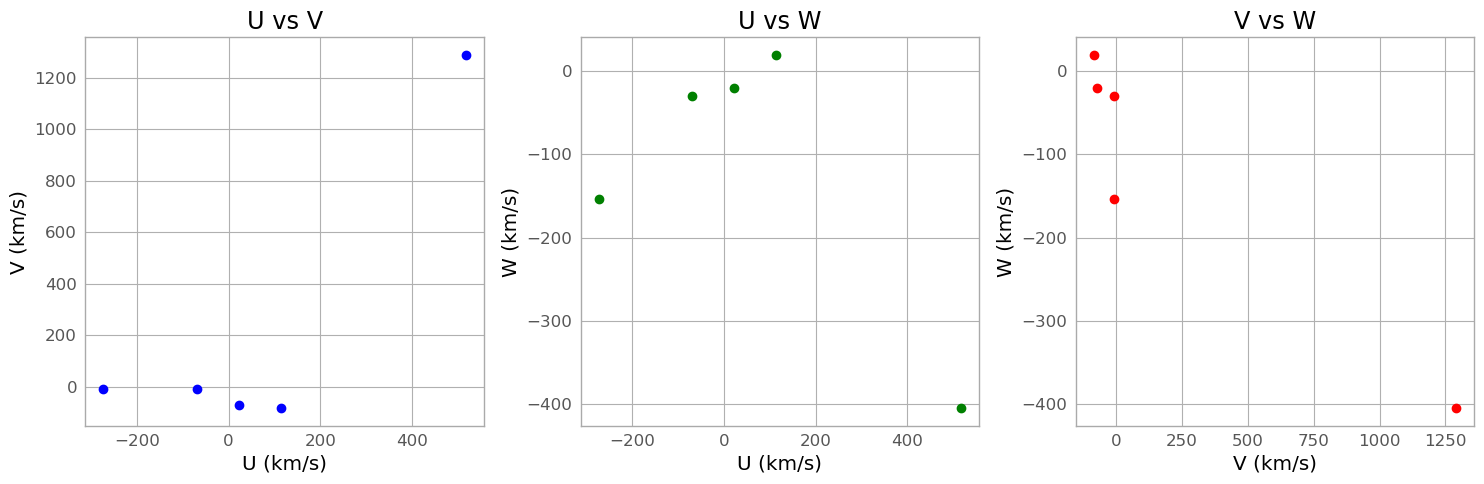

In [42]:
U = test[:,0]
V =test[:, 1]
W = test[:,2]
# Create a figure and axes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot U vs V
axs[0].scatter(U, V, c='blue', marker='o')
axs[0].set_title('U vs V')
axs[0].set_xlabel('U (km/s)')
axs[0].set_ylabel('V (km/s)')

# Plot U vs W
axs[1].scatter(U, W, c='green', marker='o')
axs[1].set_title('U vs W')
axs[1].set_xlabel('U (km/s)')
axs[1].set_ylabel('W (km/s)')

# Plot V vs W
axs[2].scatter(V, W, c='red', marker='o')
axs[2].set_title('V vs W')
axs[2].set_xlabel('V (km/s)')
axs[2].set_ylabel('W (km/s)')

# Adjust layout
plt.tight_layout()
plt.show()

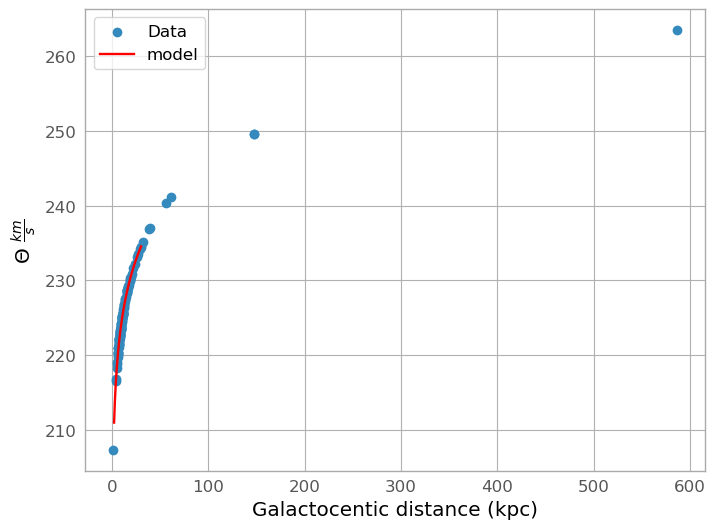

In [43]:
plt.scatter(HMXB_table['galactic distance'], HMXB_table['circular velocity'],label='Data')
R_model_fit = np.linspace(2.0,30.0,1000)
#model only valid up to 2_R0
plt.plot(R_model_fit, rotation_curve(R_model_fit),label='model',color='red')
plt.xlabel("Galactocentic distance (kpc)")
plt.ylabel(r"$\Theta$ $\frac{km}{s}$")

plt.legend()
plt.show()

#R_fit_table = np.linspace()
#plt.plot()

In [44]:
HMXB_table

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,b2,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,galactic distance,circular velocity,GR velocity,pm_l,pm_b
,,,,,,,,,mas,,,,,,,,,,,kpc,kpc,km / s,km / s,mas / yr,mas / yr
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
168450545792009600,58.84615062234396,0.02955361269414425,31.045836091857545,0.02079164795577526,-1.282117252826291,0.05307381600141525,-1.8690907560201113,0.030308086425065994,1.606402622661778,0.03745640814304352,--,--,6.261696815490723,163.0813533466715,-17.136203125538678,-17.136203125538678,6.439853668212891,5.930059909820557,0.509793758392334,0.6225089438306689,9.070779259737565,223.8221991051486,57.73005563156341,0.2998739750764102,-2.2466420505515643
184497471323752064,80.64680481184236,0.025397874414920807,37.6759929364201,0.01957647316157818,1.3049449567151956,0.04082612693309784,-3.9994793622028038,0.02804887294769287,0.7003697567669315,0.030094077810645103,--,--,7.2317328453063965,170.05338802722687,0.7103172589013076,0.7103172589013076,7.376429080963135,6.921237945556641,0.45519113540649414,1.4278172213149678,9.90931690511838,224.59780831431172,32.90408186115931,4.034945160732326,-1.1907703635148816
252878401557369088,70.24720739300419,0.011905986815690994,44.53034418647852,0.008385959081351757,0.10064623612212906,0.016362275928258896,-1.186127754569379,0.013658520765602589,0.357823380551682,0.015042701736092567,--,--,10.40385627746582,159.8470955000755,-1.2700235829277626,-1.2700235829277626,10.832097053527832,9.79090690612793,1.0411901473999023,2.794674843377278,11.164505890385186,225.64830133598005,58.43411807333186,0.9560106139046501,-0.7092759837376441
276644757710014976,64.92556123476727,0.012604312971234322,55.999360679043434,0.008108320645987988,-0.4735607216045463,0.01827656850218773,-0.5096656032780096,0.013492867350578308,0.1890882458297216,0.014864281751215458,--,--,10.766115188598633,149.17651611413766,4.133059262254314,4.133059262254314,11.439369201660156,9.855047225952148,1.5843219757080078,5.288536025134652,13.307086696895857,227.20363746243194,73.07233003220047,0.022268318000563104,-0.6953581136542384
414196617287885312,18.996040698840275,0.010982572101056576,59.15394486765568,0.012779636308550835,-2.4625832668630094,0.014893881045281887,-0.546486466252775,0.01677328534424305,0.3181933399322079,0.018039019778370857,--,--,11.412055969238281,126.08000772759438,-3.5676859152271287,-3.5676859152271287,11.667165756225586,10.951165199279785,0.7160005569458008,3.142743340300753,10.653230860548826,225.23481952872547,143.227976660706,-2.3992767526950365,-0.7787392811514604
426558460884582016,14.177450998208093,1.8335996866226196,60.71672280471204,2.3911945819854736,--,--,--,--,--,--,--,--,2.0645833015441895,123.57698659515256,-2.1484240190698634,-2.1484240190698634,2.7258431911468506,2.31510853767395,0.4107346534729004,--,--,--,--,0.0,0.0
427234969757165952,9.290132580203235,0.008413794450461864,61.36013319063004,0.009818237274885178,-1.7956235405295953,0.010947090573608875,-0.5251300483100196,0.013608978129923344,0.25089066538368454,0.012059882283210754,--,--,9.454655647277832,121.22141620023214,-1.4641898756122689,-1.4641898756122689,9.76897144317627,8.949126243591309,0.8198451995849609,3.985799943854867,11.101225455818922,225.59812279542413,145.83548265004282,-1.8219690241081707,-0.4247991785920046
444752973131169664,53.749629724978455,0.013929484412074089,53.17313997828423,0.012730369344353676,-0.26805266659388,0.019742585718631744,0.4401283844933388,0.01982794515788555,0.11334727271763657,0.020151322707533836,--,--,14.200214385986328,146.05208942276994,-2.1940257086354467,-2.1940257086354467,15.475269317626953,13.086570739746094,2.3886985778808594,8.822444299044896,16.5619073724656

In [45]:
#HMXB_table

# plotting proper motion along logitude

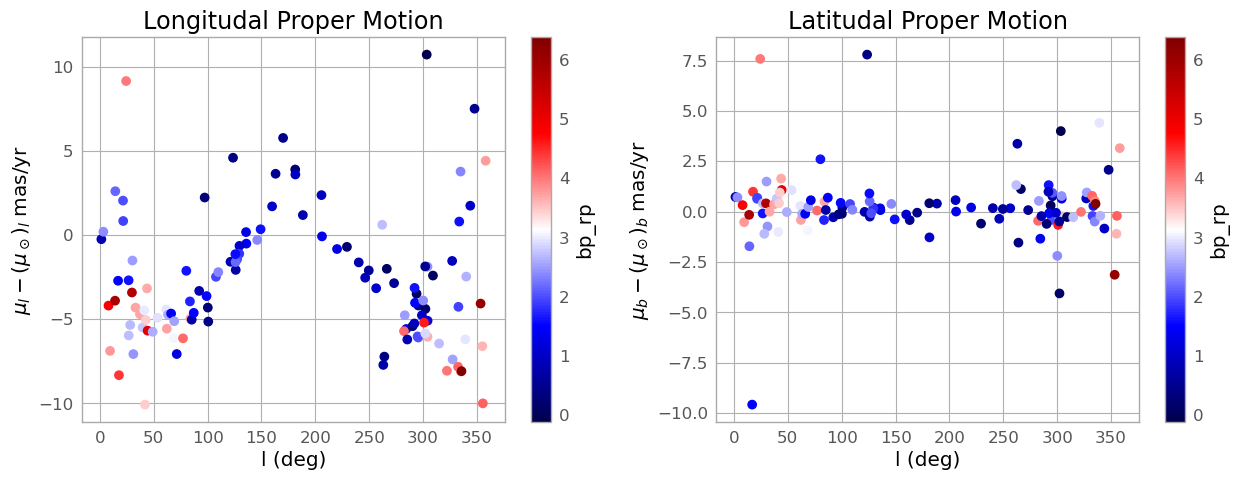

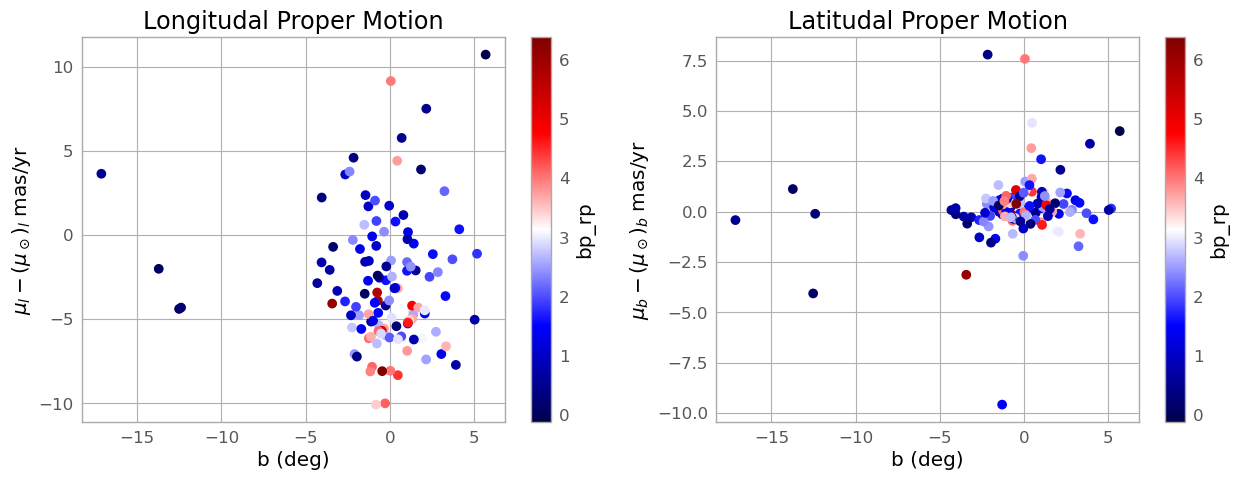

In [46]:
def galactic_proper_motion(table):
    pm_1 = table['pm_l']
    pm_b = table['pm_b']
    long = table['l']
    lat = table['b']
    dist = table['distance']
    bp_rp = table['bp_rp']
    #solar motion per object
    #moffat 1998
    #radians
    long_rad = np.radians(long)
    lat_rad = np.radians(lat)
    
    Kr_mul_sol = U_sun*np.sin(long_rad) - V_sun*np.cos(lat_rad)
    mul_sol = (Kr_mul_sol/(k*dist)) * u.mas/u.yr # need to specifiy units to subtract from proper motion
    
    Kr_mub_sol = U_sun*np.cos(long_rad)*np.sin(lat_rad) + V_sun*np.sin(long_rad)*np.sin(lat_rad) - W_sun*np.cos(lat_rad)
    mub_sol = (Kr_mub_sol/(k*dist)) *u.mas/u.yr
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns
    
    # longitudal Pm vs l 
    sc1 = axs[0].scatter(long, pm_l-mul_sol, c=bp_rp,cmap='seismic', marker='o')
    axs[0].set_title('Longitudal Proper Motion')
    axs[0].set_xlabel('l (deg)')
    axs[0].set_ylabel(r'$\mu_l - (\mu_\odot)_l $ mas/yr')
    fig.colorbar(sc1, ax=axs[0], label='bp_rp')
    
    # latitudal Pm vs l
    sc2 = axs[1].scatter(long, pm_b-mub_sol, c=bp_rp, cmap='seismic',  marker='o')
    axs[1].set_title('Latitudal Proper Motion')
    axs[1].set_ylabel(r'$\mu_b - (\mu_\odot)_b$ mas/yr')
    axs[1].set_xlabel('l (deg)')
    fig.colorbar(sc2, ax=axs[1], label='bp_rp')
    plt.show()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns
    
    # longitudal Pm vs l 
    sc3 =axs[0].scatter(lat, pm_l-mul_sol, c=bp_rp, cmap='seismic', marker='o')
    axs[0].set_title('Longitudal Proper Motion')
    axs[0].set_xlabel('b (deg)')
    axs[0].set_ylabel(r'$\mu_l - (\mu_\odot)_l $ mas/yr')
    fig.colorbar(sc3, ax=axs[0], label='bp_rp')
    
    # latitudal Pm vs l
    sc4 = axs[1].scatter(lat, pm_b-mub_sol, c=bp_rp, cmap='seismic', marker='o')
    axs[1].set_title('Latitudal Proper Motion')
    axs[1].set_ylabel(r'$\mu_b - (\mu_\odot)_b$ mas/yr')
    axs[1].set_xlabel('b (deg)')
    fig.colorbar(sc4, ax=axs[1], label='bp_rp')
    plt.show()
    return None
galactic_proper_motion(HMXB_table)

In [47]:
HMXB_table

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,b2,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,galactic distance,circular velocity,GR velocity,pm_l,pm_b
,,,,,,,,,mas,,,,,,,,,,,kpc,kpc,km / s,km / s,mas / yr,mas / yr
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
168450545792009600,58.84615062234396,0.02955361269414425,31.045836091857545,0.02079164795577526,-1.282117252826291,0.05307381600141525,-1.8690907560201113,0.030308086425065994,1.606402622661778,0.03745640814304352,--,--,6.261696815490723,163.0813533466715,-17.136203125538678,-17.136203125538678,6.439853668212891,5.930059909820557,0.509793758392334,0.6225089438306689,9.070779259737565,223.8221991051486,57.73005563156341,0.2998739750764102,-2.2466420505515643
184497471323752064,80.64680481184236,0.025397874414920807,37.6759929364201,0.01957647316157818,1.3049449567151956,0.04082612693309784,-3.9994793622028038,0.02804887294769287,0.7003697567669315,0.030094077810645103,--,--,7.2317328453063965,170.05338802722687,0.7103172589013076,0.7103172589013076,7.376429080963135,6.921237945556641,0.45519113540649414,1.4278172213149678,9.90931690511838,224.59780831431172,32.90408186115931,4.034945160732326,-1.1907703635148816
252878401557369088,70.24720739300419,0.011905986815690994,44.53034418647852,0.008385959081351757,0.10064623612212906,0.016362275928258896,-1.186127754569379,0.013658520765602589,0.357823380551682,0.015042701736092567,--,--,10.40385627746582,159.8470955000755,-1.2700235829277626,-1.2700235829277626,10.832097053527832,9.79090690612793,1.0411901473999023,2.794674843377278,11.164505890385186,225.64830133598005,58.43411807333186,0.9560106139046501,-0.7092759837376441
276644757710014976,64.92556123476727,0.012604312971234322,55.999360679043434,0.008108320645987988,-0.4735607216045463,0.01827656850218773,-0.5096656032780096,0.013492867350578308,0.1890882458297216,0.014864281751215458,--,--,10.766115188598633,149.17651611413766,4.133059262254314,4.133059262254314,11.439369201660156,9.855047225952148,1.5843219757080078,5.288536025134652,13.307086696895857,227.20363746243194,73.07233003220047,0.022268318000563104,-0.6953581136542384
414196617287885312,18.996040698840275,0.010982572101056576,59.15394486765568,0.012779636308550835,-2.4625832668630094,0.014893881045281887,-0.546486466252775,0.01677328534424305,0.3181933399322079,0.018039019778370857,--,--,11.412055969238281,126.08000772759438,-3.5676859152271287,-3.5676859152271287,11.667165756225586,10.951165199279785,0.7160005569458008,3.142743340300753,10.653230860548826,225.23481952872547,143.227976660706,-2.3992767526950365,-0.7787392811514604
426558460884582016,14.177450998208093,1.8335996866226196,60.71672280471204,2.3911945819854736,--,--,--,--,--,--,--,--,2.0645833015441895,123.57698659515256,-2.1484240190698634,-2.1484240190698634,2.7258431911468506,2.31510853767395,0.4107346534729004,--,--,--,--,0.0,0.0
427234969757165952,9.290132580203235,0.008413794450461864,61.36013319063004,0.009818237274885178,-1.7956235405295953,0.010947090573608875,-0.5251300483100196,0.013608978129923344,0.25089066538368454,0.012059882283210754,--,--,9.454655647277832,121.22141620023214,-1.4641898756122689,-1.4641898756122689,9.76897144317627,8.949126243591309,0.8198451995849609,3.985799943854867,11.101225455818922,225.59812279542413,145.83548265004282,-1.8219690241081707,-0.4247991785920046
444752973131169664,53.749629724978455,0.013929484412074089,53.17313997828423,0.012730369344353676,-0.26805266659388,0.019742585718631744,0.4401283844933388,0.01982794515788555,0.11334727271763657,0.020151322707533836,--,--,14.200214385986328,146.05208942276994,-2.1940257086354467,-2.1940257086354467,15.475269317626953,13.086570739746094,2.3886985778808594,8.822444299044896,16.5619073724656

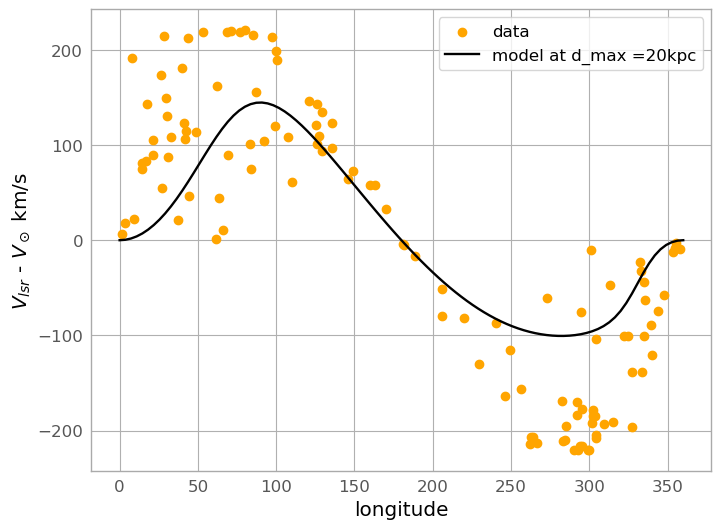

In [48]:
def vlsr_model(table,plot):
    '''Calculate the Velocity as Local Standard of Rest based on 
    1) Galactocentric distance
    2) Circular Velocity due to galactic rotation (see rotation_curve function)
    3) Galactic Latitude and Longitude
    
    Compare with a model from Brand 1993 which reduces solar motion
    input:
    table- astropy table
    plot- boolean'''
    gal_dist = table['galactic distance']
    theta = rotation_curve(gal_dist) # km/s
    long  = np.radians(table['l']) # deg to radians
    lat = np.radians(table['b'])

    #subtracting solar motion
    Vr = (theta * (R0/gal_dist) - theta_o)*np.sin(long)*np.cos(lat)

    #added Brand's fortan code here
    n_steps = 100
    dd_max = 20#kpc
    dd = np.linspace(0,dd_max,n_steps)
    #from 0 to 360
    long_dd = np.linspace(0,2*np.pi,n_steps)
    #from -90 to 90
    lat_dd = np.linspace(-np.pi/2,np.pi/2,n_steps)
    gal_dd_sqrd = R0**2 + (dd**2 *np.cos(lat_dd)**2) - 2*R0*dd*np.cos(long_dd)*np.cos(lat_dd)
    gal_dd = np.sqrt(gal_dd_sqrd)
    theta_dd = rotation_curve(gal_dd)
    
    Vr_dd = (theta_dd * (R0/gal_dd) - theta_o)*np.sin(long_dd)*np.cos(lat_dd)
    
    if plot:
        plt.scatter(np.degrees(long), Vr, label='data',color='orange')
        plt.plot(np.degrees(long_dd), Vr_dd,label=f'model at d_max ={dd_max}kpc',color='black')
        plt.xlabel('longitude')
        plt.ylabel(r'$V_{lsr}$ - $V_\odot$ km/s')
        plt.legend()
        plt.show()
    return Vr, dd, Vr_dd
Vr_test,dd,Vr_dd_test = vlsr_model(HMXB_table,plot=True)

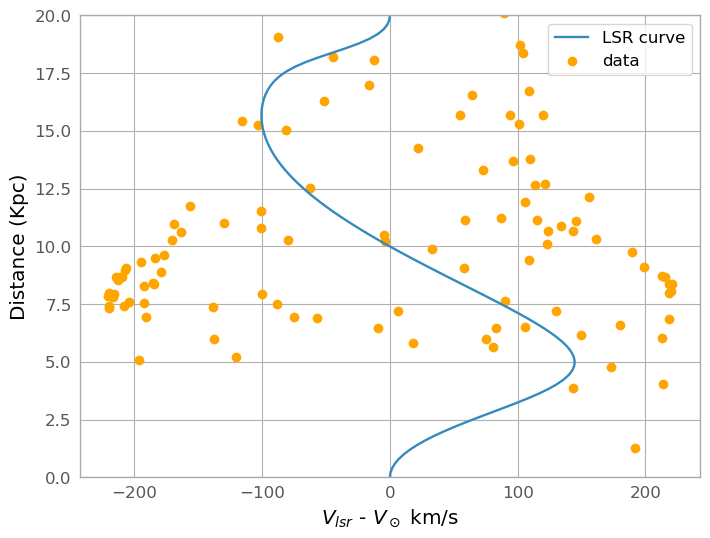

In [49]:
# plt.scatter(Vr_test,HMXB_table['distance'])
# plt.plot(Vr_dd_test,dd,color='k')
# plt.show()
plt.plot(Vr_dd_test,dd,label='LSR curve')
plt.scatter(Vr_test, HMXB_table['galactic distance'],label='data',c='orange')
plt.ylabel('Distance (Kpc)')
plt.xlabel(r'$V_{lsr}$ - $V_\odot$ km/s')
plt.legend()
plt.ylim(0,20)
plt.show()

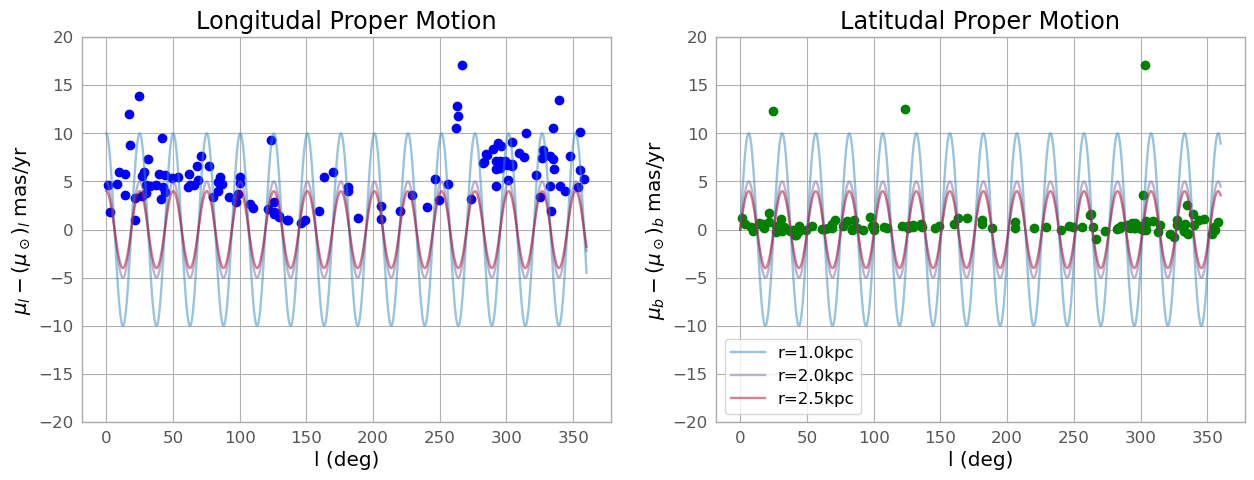

In [50]:
def proper_motion_curves(table,vt):
    lat = table['b']
    long = table['l']
    dist = table['distance']

    #my calcultion
    # mas/yr
    mu_l = vt*np.cos(lat)/(k*dist)
    mu_b = vt*np.sin(lat)/(k*dist)

    long_rad = np.radians(long)
    lat_rad = np.radians(lat)
    mu_l = vt*np.cos(lat_rad)/(k*dist)
    mu_b = vt*np.sin(lat_rad)/(k*dist)

    Kr_mul_sol = U_sun*np.sin(long_rad) - V_sun*np.cos(lat_rad)
    mul_sol = (Kr_mul_sol/(k*dist)) * u.mas/u.yr # need to specifiy units to subtract from proper motion
    
    Kr_mub_sol = U_sun*np.cos(long_rad)*np.sin(lat_rad) + V_sun*np.sin(long_rad)*np.sin(lat_rad) - W_sun*np.cos(lat_rad)
    mub_sol = (Kr_mub_sol/(k*dist)) *u.mas/u.yr

    #define units
    mu_l = mu_l *u.mas/u.yr
    mu_b = mu_b *u.mas/u.yr

    pm_l = mu_l - mul_sol
    pm_b = mu_b - mub_sol
    nstep = 1000
    model_long = np.linspace(0,360,nstep)
    model_lat = np.linspace(0,90,nstep)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns
    dist_array = np.array([1,2,2.5])
    for model_dist in dist_array:
        min_mul, max_mul = np.min(vt*np.cos(lat)), np.max(vt*np.cos(lat))
        min_mub, max_mub = np.min(vt*np.sin(lat)), np.max(vt*np.sin(lat))
        
        model_mul = (10*np.cos(model_lat))/(model_dist)*u.mas/u.yr
        model_mub= (10*np.sin(model_lat))/(model_dist)*u.mas/u.yr
        #calulate solar motion
        model_Kr_mul_sol = U_sun*np.sin(np.radians(model_long)) - V_sun*np.cos(np.radians(model_lat))
        model_mul_sol = (model_Kr_mul_sol/(k*model_dist)) * u.mas/u.yr # need to specifiy units to subtract from proper motion
    
        model_Kr_mub_sol = U_sun*np.cos(np.radians(model_long))*np.sin(np.radians(model_lat))
        + V_sun*np.sin(np.radians(model_long))*np.sin(np.radians(model_lat)) - W_sun*np.cos(np.radians(model_lat))
        
        model_mub_sol = (Kr_mub_sol/(k*model_dist)) *u.mas/u.yr
        #calculate the proper motion account for solar motion
        model_pm_l = model_mul #- model_mul_sol
        model_pm_b = model_mub #- model_mub_sol
        #longitiude for plotting
        model_long = np.linspace(0,360,nstep)
        axs[0].plot(model_long,model_pm_l,label=f'r = {model_dist}kpc',alpha=0.5)
        axs[1].plot(model_long,model_pm_b,label=f'r={model_dist}kpc',alpha=0.5)
        

    #make test distance arrays 
    # longitudal Pm vs l 
    axs[0].scatter(long, pm_l, c='blue', marker='o')
    axs[0].set_title('Longitudal Proper Motion')
    axs[0].set_xlabel('l (deg)')
    axs[0].set_ylabel(r'$\mu_l - (\mu_\odot)_l $ mas/yr')
    axs[0].set_ylim(-20,20)
    
    # latitudal Pm vs l
    axs[1].scatter(long, pm_b, c='green', marker='o')
    axs[1].set_title('Latitudal Proper Motion')
    axs[1].set_ylabel(r'$\mu_b - (\mu_\odot)_b$ mas/yr')
    axs[1].set_xlabel('l (deg)')
    axs[1].set_ylim(-20,20)
    plt.legend()
    plt.show()
    
    return None
proper_motion_curves(HMXB_table,vt)

# Galactic Rotation Curve Moffat 1998
Flat curve model

In [51]:
HMXB_table
R0,k

(8.5, 4.74)

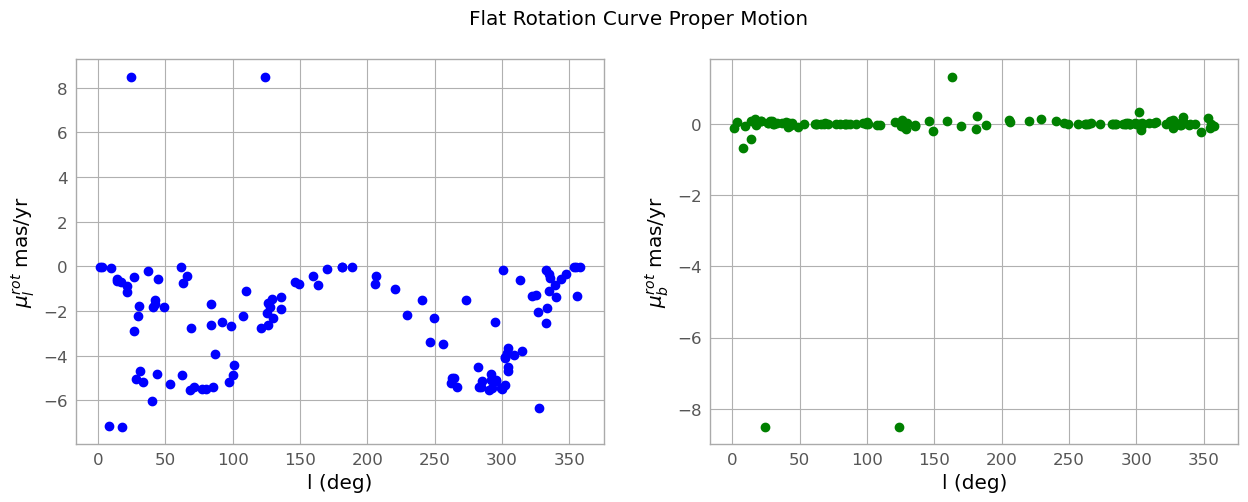

In [52]:
def flat_rotation_curve(table):
    '''Based off moffat 1998
    Model the proper motion in l and b due to the galactic rotation curve'''
    R = table['galactic distance']
    lat = table['b']
    long = table['l']
    dist = table['distance']
    omega_0 = sun_curve/R0 # km/s per kpc
    omega  =sun_curve/R
    long_rad = np.radians(long)
    lat_rad = np.radians(lat)
    #calculate proper motion due to galactic rotation
    K_mul_rot = ((R0/dist*np.cos(lat_rad)) *(omega-omega_0)*np.cos(long_rad))-omega
    mul_rot = K_mul_rot/(k)
    mul_rot = mul_rot*u.mas/u.yr
    #do the same for latitudal proper motion
    K_mub_rot = -(R0 /dist)*(omega-omega_0)*np.sin(lat_rad)*np.cos(long_rad)
    mub_rot = K_mub_rot/k*u.mas/u.yr

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns
    fig.suptitle("Flat Rotation Curve Proper Motion")
    axs[0].scatter(long, mul_rot, c='blue', marker='o')
    #axs[0].set_title('Longitudal Proper Motion')
    axs[0].set_xlabel('l (deg)')
    axs[0].set_ylabel(r'$\mu^{rot}_{l} $ mas/yr')
    #axs[0].set_ylim(-20,20)
    
    # latitudal Pm vs l
    axs[1].scatter(long, mub_rot, c='green', marker='o')
   # axs[1].set_title('Latitudal Proper Motion')
    axs[1].set_ylabel(r'$\mu^{rot}_{b}$ mas/yr')
    axs[1].set_xlabel('l (deg)')
    #axs[1].set_ylim(-20,20)

    return None

flat_rotation_curve(HMXB_table)

# Exporting

In [53]:
HMXB_table.write("HMXB_with_analysis.csv",format='csv',overwrite=True)